<a id='main'></a>

### Data & Folders
[Data &  Folders](#data_folders)

### Functions
[functions](#functions)

### Plots:
[plots](#plots)

In [1]:
import os
#from VPM_plotting import *
from VPM_plotting_parallel import *
from virusPropagationModel import *

import VPM_plotting as vpm_plot
import get_status_data_and_plots_from_parallel as plt_para
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
from functools import partial

%matplotlib inline

defaultCmap = cm.get_cmap('Set2')
red_pur_Cmap = cm.get_cmap('PuRd')
reds_Cmap = cm.get_cmap('Reds')

#confi_z_dict = { 99 : 2.576, 
#                 98 : 2.326,
#                 95 : 1.96,
#                 90 : 1.645,}
#ci = z*sigma/sqrt(n)


Bad key "text.kerning_factor" on line 4 in
/usr/share/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


<a id='data_folders'></a>
### Data &  Folders 
[back to top](#main)

In [2]:
server_data_folder_str = '/media/hexe/grossePlatte/job/coronaModel/simulation_results/'
scenarios_list = os.listdir(server_data_folder_str)
scenarios_list.sort()
scenarios_list = [x for x in scenarios_list if '.pptx' not in x]

print(len(scenarios_list))
scenarios_list

31


['LockDownLight',
 'base_scenario',
 'close_all_336',
 'close_public_home_office_scan_0.2_0.9',
 'close_public_inf_0.15',
 'disobedience_scan_0.00_0.45',
 'incidence_scan_LockDownLight',
 'incidence_scan_control',
 'infectivity_scan_0.025_0.500',
 'infectivity_scan_0.05_0.50',
 'lockdown_start_scan_100_550',
 'mix_base_scenario',
 'mix_product_0.6',
 'modified_interaction_frequencies_Bad_Feilnbach',
 'modified_interaction_frequencies_Gangelt',
 'no_infections',
 'no_infections_mix',
 'product_0.6_scan_inf_0.075_1.200',
 'recover_from_world_scan_0.5_0.9',
 'recover_interaction_scan_0.5_0.9',
 'recover_ordered1_0.5_0.9',
 'recover_pensioner_infectivity_0.15',
 'recover_random_scan_0.5_0.9',
 'recover_random_scan_0_1',
 'recover_schedule_type',
 'reopen_all_scan_500_1500',
 'reopen_all_scan_672_1344',
 'reopen_public_scan_500_1500',
 'reopen_school_scan_500_1500',
 'reopen_work_scan_500_1500',
 'school_time_separation']

In [3]:
## adapt scenarios list to contain only scaned scenarios
scans_per_scene_dict = {}
scenarios_list = [x for x in scenarios_list if 'scan' in x]
for scene in scenarios_list:
    working_dir = server_data_folder_str + scene + '/'
    scans_list = os.listdir(working_dir)
    scans_list = [x for x in scans_list if '.pptx' not in x]
    scans_per_scene_dict[scene] = scans_list

print(len(scenarios_list))
scenarios_list

17


['close_public_home_office_scan_0.2_0.9',
 'disobedience_scan_0.00_0.45',
 'incidence_scan_LockDownLight',
 'incidence_scan_control',
 'infectivity_scan_0.025_0.500',
 'infectivity_scan_0.05_0.50',
 'lockdown_start_scan_100_550',
 'product_0.6_scan_inf_0.075_1.200',
 'recover_from_world_scan_0.5_0.9',
 'recover_interaction_scan_0.5_0.9',
 'recover_random_scan_0.5_0.9',
 'recover_random_scan_0_1',
 'reopen_all_scan_500_1500',
 'reopen_all_scan_672_1344',
 'reopen_public_scan_500_1500',
 'reopen_school_scan_500_1500',
 'reopen_work_scan_500_1500']

<a id='functions'></a>
### Functions 
[back to top](#main)

In [4]:
def get_df_stat(folder_scenario,server_data_folder, stat='I'):
    assert stat in ['I','D','R','S'], stat+" not in ['I','D','R','S']"
    try:
        df_stat = pd.read_csv(server_data_folder + folder_scenario +
                         '/'+folder_scenario+'_'+stat+'.csv')
    except:
        try:
            df_stat = pd.read_csv(server_data_folder + folder_scenario +
                             '/IAR_1_0_99_'+folder_scenario[:-10]+'_'+stat+'.csv')
        except:
            print("can't read ", server_data_folder + folder_scenario +
                  '/'+folder_scenario+'_'+stat+'.csv')
    return(df_stat.drop('time', axis=1))

In [5]:
def assign_subplot_grid(scan_length):
    if scan_length > 1 and scan_length <= 3:
        x = scan_length
        y = 1
    elif scan_length <= 8 or scan_length == 10:
        x = int((scan_length+1)/2)
        y = 2
    elif scan_length == 9 or scan_length == 11:
        x = int((scan_length+1)/3)
        y = 3
    else:
        print("problem: number of subplots exceeds figure definitions: " + str(scan_length))
        
    return(x,y)

In [33]:
def plot_statii_for_scan(server_data_folder, scenario, scans_list, x=5, y=2, prefix = 3, suffix = 10):
    scale_factor = 12/x
    data_folder = server_data_folder + scenario + '/'
    fig, axes = plt.subplots(y, x, figsize=(12,y*scale_factor), sharey=True, sharex=True)
    ax_series = axes.flatten()
    
    for k,s in enumerate(scans_list):
        plot_stat_para(ax_series[k], s, data_folder, prefix = prefix, suffix = suffix)
        try:
            ax_series[k].set_title(s.split('_ri')[0].split('IF03_')[1].split('_')[3])
        except:
            try:
                ax_series[k].set_title(s.split('_ri')[0].split('IF03_')[1].split('_')[2])
            except:
                ax_series[k].set_title(s.split('_ri')[0].split('IF03_')[1].split('_')[1])
    plt.tight_layout()
    
    return(ax_series, fig)

<a id='plots'></a>
# Plots
[back to top](#main)

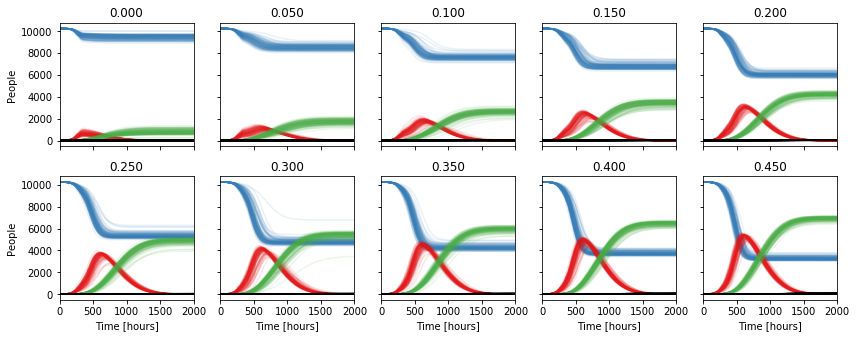

In [21]:
scan = 'disobedience_scan_0.00_0.45'
data_folder = server_data_folder_str + scan + '/'
subfolder_list = os.listdir(data_folder)
subfolder_list = [x for x in subfolder_list if 'plot' not in x]

output_folder = data_folder + "/plots/"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

scan_length = len(subfolder_list)
x,y = assign_subplot_grid(scan_length)
ax_series, fig1 = plot_statii_for_scan(server_data_folder_str, scan, subfolder_list, x, y)
fig1.savefig(output_folder + "/Disobedience_Fraction_Scan_0_0.45.png")

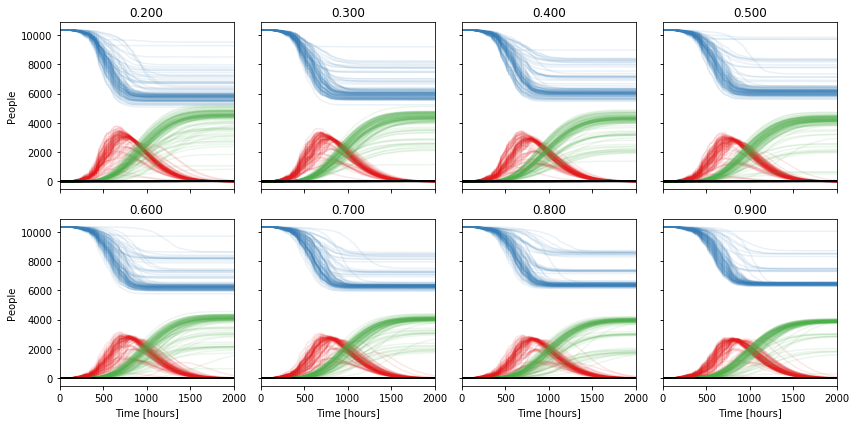

In [24]:
scan = 'close_public_home_office_scan_0.2_0.9'
data_folder = server_data_folder_str + scan + '/'
subfolder_list = os.listdir(data_folder)
subfolder_list = [x for x in subfolder_list if 'plot' not in x]

output_folder = data_folder + "/plots/"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

scan_length = len(subfolder_list)
x,y = assign_subplot_grid(scan_length)
ax_series, fig2 = plot_statii_for_scan(server_data_folder_str, scan, subfolder_list, x, y)
fig2.savefig(output_folder + "/ClosePublic_HomeOfice_Fraction_Scan_0.2_0.9.png")

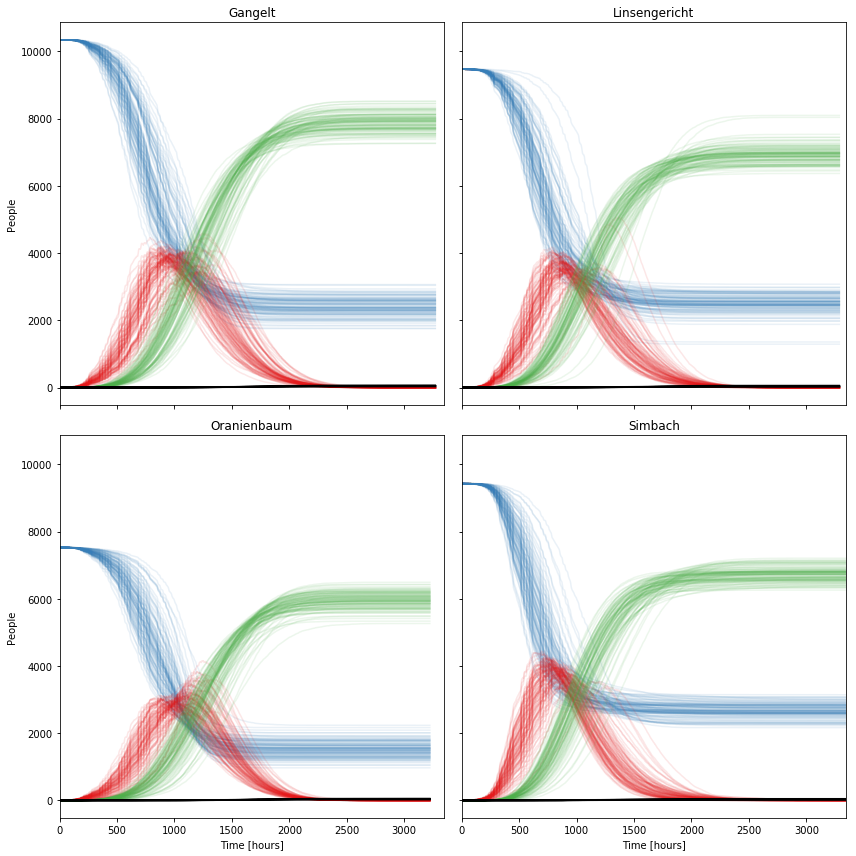

In [29]:
## using the default plotting properties
scan = 'incidence_scan_LockDownLight'
data_folder = server_data_folder_str + scan + '/'
subfolder_list = os.listdir(data_folder)
subfolder_list = [x for x in subfolder_list if 'plot' not in x]

output_folder = data_folder + "/plots/"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

scan_length = len(subfolder_list)
x,y = assign_subplot_grid(scan_length)
fig3, axes = plt.subplots(y, x, figsize=(12,y*12/x), sharey=True, sharex=True)
ax_series = axes.flatten()
    
for k,s in enumerate(subfolder_list):
    plot_stat_para(ax_series[k], s, data_folder, prefix = 0, suffix = 10)
    ax_series[k].set_title(s.split('_')[0])
plt.tight_layout()
fig3.savefig(output_folder + "/Incidence_Scan_LockDownLight.png")

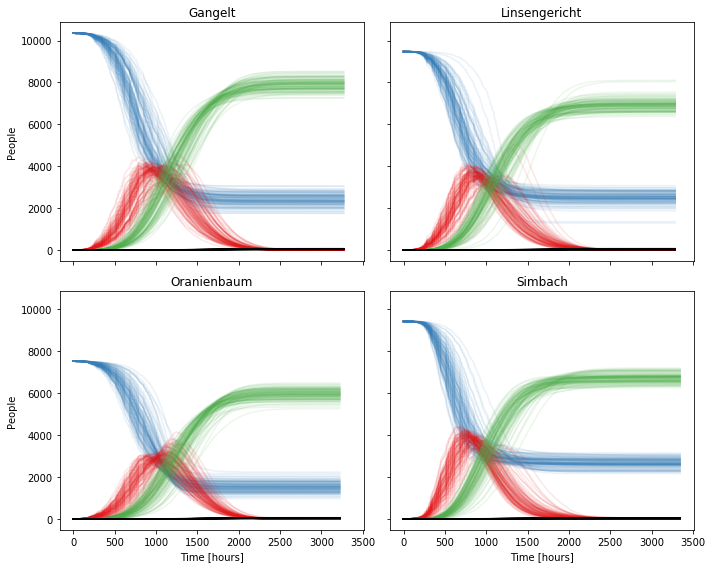

In [4]:
## adjusting to incidence_scan_LockDownLight
group_folder = 'incidence_scan_LockDownLight'
data_folder = server_data_folder_str+group_folder +'/'
subfolder = os.listdir(data_folder)

fig, axes = plt.subplots(2,2, figsize=(10,8), sharey=True, sharex=True)
ax_series = axes.flatten()

for k,s in enumerate(subfolder):
    #ax_series[k].plot()
    plot_stat_para(ax_series[k], s, data_folder)
    ax_series[k].set_title(s.split('_')[0])
plt.tight_layout()    

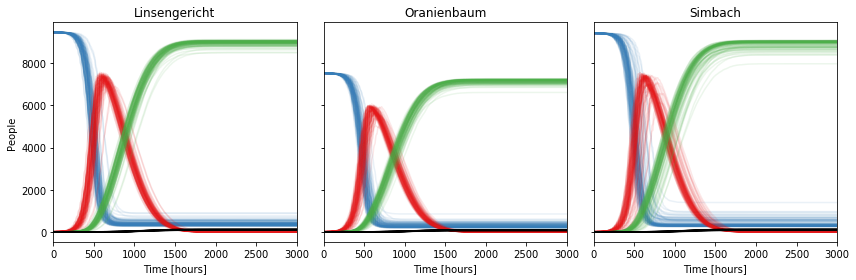

In [30]:
## using the default plotting properties
scan = 'incidence_scan_control'
data_folder = server_data_folder_str + scan + '/'
subfolder_list = os.listdir(data_folder)
subfolder_list = [x for x in subfolder_list if 'plot' not in x]

output_folder = data_folder + "/plots/"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

scan_length = len(subfolder_list)
x,y = assign_subplot_grid(scan_length)
fig4, axes = plt.subplots(y, x, figsize=(12,y*12/x), sharey=True, sharex=True)
ax_series = axes.flatten()
    
for k,s in enumerate(subfolder_list):
    plot_stat_para(ax_series[k], s, data_folder, prefix = 0, suffix = 10)
    ax_series[k].set_title(s.split('_')[0])

plt.tight_layout()
fig4.savefig(output_folder + "/Incidence_Scan_Control.png")

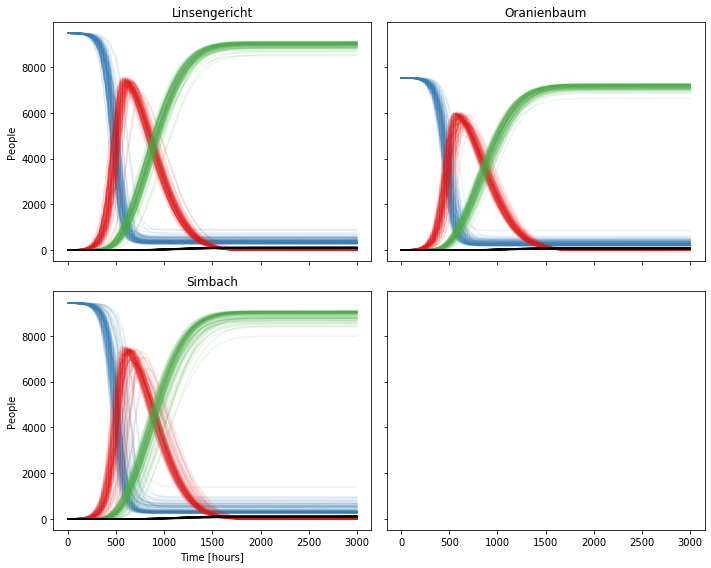

In [4]:
## adjusting to incidence_scan_control
group_folder = 'incidence_scan_control'
data_folder = server_data_folder_str+group_folder +'/'
subfolder = os.listdir(data_folder)

fig, axes = plt.subplots(2,2, figsize=(10,8), sharey=True, sharex=True)
ax_series = axes.flatten()

for k,s in enumerate(subfolder):
    #ax_series[k].plot()
    plot_stat_para(ax_series[k], s, data_folder)
    ax_series[k].set_title(s.split('_')[0])
plt.tight_layout()    

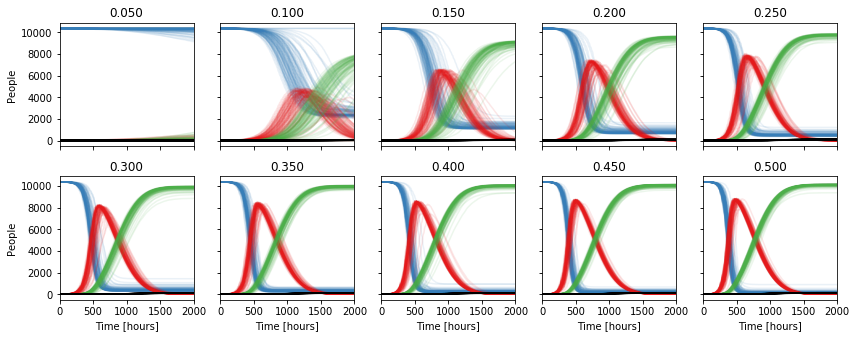

In [31]:
## infectivity_scan_0.025_0.500 should be deleted, contains crashed sims and is redundant w the below
scan = 'infectivity_scan_0.05_0.50'
data_folder = server_data_folder_str + scan + '/'
subfolder_list = os.listdir(data_folder)
subfolder_list = [x for x in subfolder_list if 'plot' not in x]

output_folder = data_folder + "/plots/"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

scan_length = len(subfolder_list)
x,y = assign_subplot_grid(scan_length)
ax_series, fig5 = plot_statii_for_scan(server_data_folder_str, scan, subfolder_list, x, y)
fig5.savefig(output_folder + "/Infectivity_Scan_0.05_0.5.png")

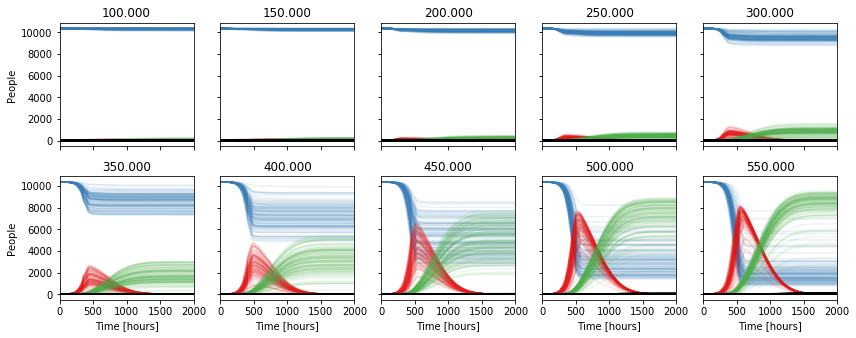

In [32]:
scan = 'lockdown_start_scan_100_550'
data_folder = server_data_folder_str + scan + '/'
subfolder_list = os.listdir(data_folder)
subfolder_list = [x for x in subfolder_list if 'plot' not in x]

output_folder = data_folder + "/plots/"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

scan_length = len(subfolder_list)
x,y = assign_subplot_grid(scan_length)
ax_series, fig6 = plot_statii_for_scan(server_data_folder_str, scan, subfolder_list, x, y, prefix=0, suffix=10)
fig6.savefig(output_folder + "/Lockdown_Start_Scan_100_550.png")

can't read  /media/hexe/grossePlatte/job/coronaModel/simulation_results/product_0.6_scan_inf_0.075_1.200/parralel_HM_V2_RPM02_hm_Gangelt_big_no_mitigation_IF03_prod_0.6_inf_0.075_ri_1_rx_0/parralel_HM_V2_RPM02_hm_Gangelt_big_no_mitigation_IF03_prod_0.6_inf_0.075_ri_1_rx_0_S.csv


UnboundLocalError: local variable 'df_stat' referenced before assignment

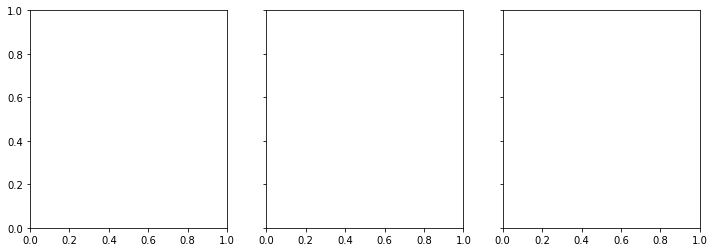

In [34]:
scan = 'product_0.6_scan_inf_0.075_1.200'
data_folder = server_data_folder_str + scan + '/'
subfolder_list = os.listdir(data_folder)
subfolder_list = [x for x in subfolder_list if 'plot' not in x]

output_folder = data_folder + "/plots/"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

scan_length = len(subfolder_list)
x,y = assign_subplot_grid(scan_length)
ax_series, fig7 = plot_statii_for_scan(server_data_folder_str, scan, subfolder_list, x, y, prefix=0, suffix=10)
fig7.savefig(output_folder + "/Product_0.6_Scan_inf_0.075_1.2.png")

#### statii with errors

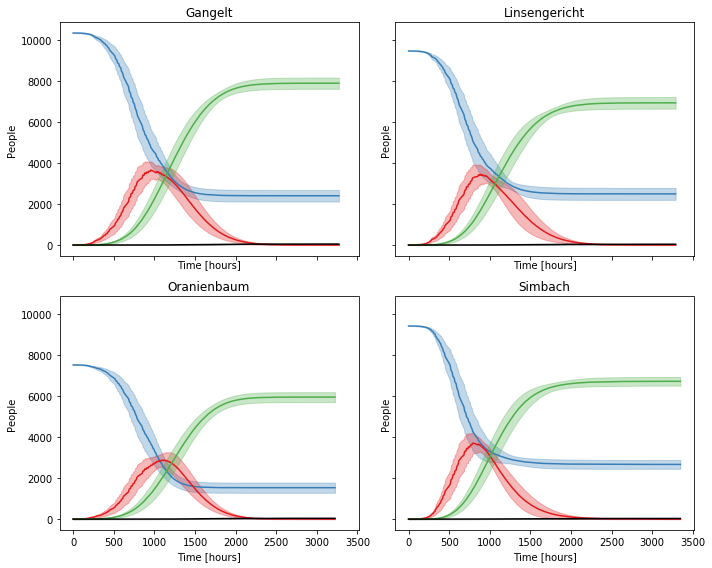

In [5]:
group_folder = 'incidence_scan_LockDownLight'
data_folder = server_data_folder_str+group_folder +'/'
subfolder = os.listdir(data_folder)

fig, axes = plt.subplots(2,2, figsize=(10,8), sharey=True, sharex=True)
ax_series = axes.flatten()

for k,s in enumerate(subfolder):
    #ax_series[k].plot()
    plot_stat_para_mean_error(ax_series[k], s, data_folder)
    ax_series[k].set_title(s.split('_')[0])
plt.tight_layout()    

## combined


In [11]:
group_folder_c = 'incidence_scan_control'
group_folder_ldl = 'incidence_scan_LockDownLight'
group_folders = ['incidence_scan_control','incidence_scan_LockDownLight']

<a id='infection'></a>
#### infection 
[back to top](#main)

In [9]:
len(df_I.columns)

NameError: name 'df_I' is not defined

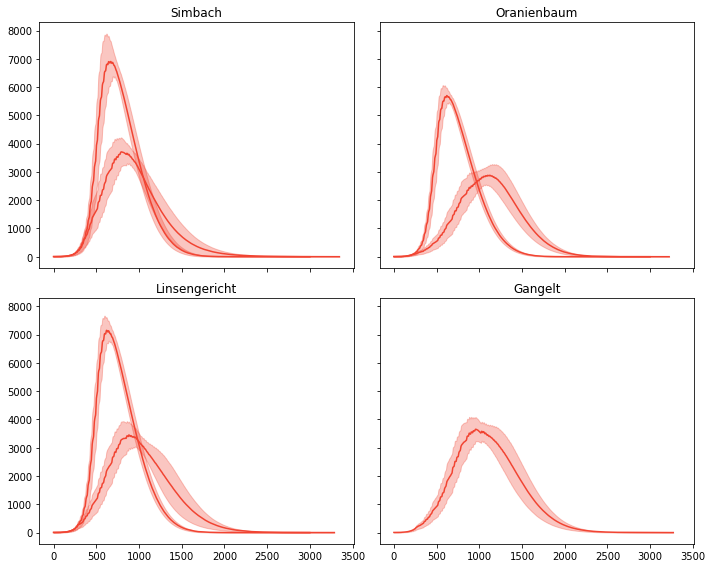

In [17]:
r1=reds_Cmap(0.6)
r2=reds_Cmap(1)

group_folder = 'incidence_scan_control'

fig, axes = plt.subplots(2,2, figsize=(10,8), sharey=True, sharex=True)
ax_series = axes.flatten()

for group_folder in group_folders:
    
    data_folder = server_data_folder_str+group_folder +'/'
    subfolder = os.listdir(data_folder)
    subfolder.sort(reverse=True)
    
    for k,s in enumerate(subfolder):
        #data
        df_I = get_df_stat(s, data_folder,stat='I')
        df_I_m = df_I.mean(axis=1)
        df_I_std = df_I.std(axis=1)
        CI = confi_z_dict[99]*df_I_std.values/np.sqrt(len(df_I.columns))
        
        #plot
        ax_series[k].plot(df_I_m, color=r1)
        #ax_series[k].fill_between(df_I_m.index,df_I_m.values-CI,df_I_m.values+CI, color=r1, alpha=0.3)
        ax_series[k].fill_between(df_I_m.index,df_I_m.values-df_I_std,df_I_m.values+df_I_std, color=r1, alpha=0.3)
        ax_series[k].set_title(s.split('_')[0])
plt.tight_layout()   

In [102]:
s.split('_')[0]

'Simbach'

In [99]:
df_R = get_df_stat(s, data_folder,stat='R')
df_S = get_df_stat(s, data_folder,stat='S')
df_I = get_df_stat(s, data_folder,stat='I')

r1=reds_Cmap(0.6)
r2=reds_Cmap(1)

In [73]:
np.sqrt(len(df_I.columns))
df_I_m

0       9425.00
1       9425.00
2       9425.00
3       9425.00
4       9425.00
         ...   
2995     412.04
2996     412.04
2997     412.04
2998     412.04
2999     412.04
Length: 3000, dtype: float64

Text(0, 0.5, 'Infected Agents')

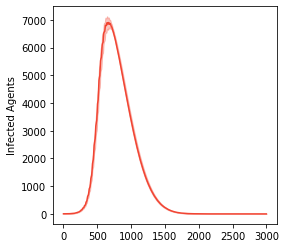

In [100]:
df_I_m = df_I.mean(axis=1)
df_I_st = df_I.std(axis=1)

fig, ax = plt.subplots(1,1,figsize=(4,4))
CI = confi_z_dict[99]*df_I_st.values/np.sqrt(len(df_I.columns))
ax.plot(df_I_m, color=r1)
ax.fill_between(df_I_m.index,df_I_m.values-CI,df_I_m.values+CI, color=r1, alpha=0.3)
ax.set_ylabel('Infected Agents')


In [95]:
df_R_m = df_R.iloc[-1].mean()
df_R_std = df_R.iloc[-1].std()
df_S_m = df_R.iloc[-1].mean()
df_S_std = df_R.iloc[-1].std()
reds_Cmap(0.4)

(0.9874509803921568, 0.5411764705882353, 0.41568627450980394, 1.0)